<a href="https://colab.research.google.com/github/pavanghai/DS-Unit-1-Sprint-2-Statistics/blob/master/DSPT6_123_Introduction_to_Bayesian_Inference_Assignment_Pavneet_Ghai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

## 1) Write a function

In [0]:
def prob_drunk_given_positive(prob_drunk_prior = 1/1000,false_positive_rate = 1, true_positive_rate = 0.08, number_of_tests = 1):
    posterior_probability=prob_drunk_prior
    for test in range(0, number_of_tests):
        P_user = posterior_probability # prior belief
        P_non_user = 1 - P_user  # complement of the prior belief
        P_pos_given_user = false_positive_rate # this is the true positive rate
        P_pos_given_non_user = true_positive_rate # this is the false positive rate
        posterior_probability = (P_pos_given_user*P_user)/((P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user))
    return posterior_probability

In [18]:
print("Probability after one positive breathalyzer test is: ", prob_drunk_given_positive())

Probability after one positive breathalyzer test is:  0.012357884330202669


In [20]:
print("Probability after two positive breathalyzer test is: ", prob_drunk_given_positive(number_of_tests = 2))

Probability after two positive breathalyzer test is:  0.13525210993291495


In [21]:
print("After four test, probability is greater than 95% : ", prob_drunk_given_positive(number_of_tests = 4))

After four test, probability is greater than 95% :  0.9606895076105054


## 2. Explore scipy.stats.bayes_mvs

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
# Removed "s" from https:// to avoide certificate expired error
dataset_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data")

#dataset is without column headers we need column Headers
column_headers = ['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban','aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

# header=none, made blank header, names=column_headers, changed the blank to as per column_headers variable, na_value, replaced ? with nun value
voters_df = pd.read_csv(dataset_url, header=None, names=column_headers, na_values='?') 

In [0]:
#Replace N with 0 and Y with 1 and Split dataframe into republican and democrat
voters_df=voters_df.replace({'y': 1, 'n': 0}) # Replaced 'y' with 1 & 'n' with 0 using Dictionary {key:value}
rep_df = voters_df[voters_df['party']=='republican'] # rep_df where party columns values are republican
dem_df = voters_df[voters_df['party']=='democrat'] # dem_df where party columns values are democrat

In [41]:
print("Voters :",voters_df.shape, 'Republican : ', rep_df.shape, 'Democrat :', dem_df.shape)
voters_df.head(5)

Voters : (435, 17) Republican :  (168, 17) Democrat : (267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Define function for Confidence of intervel 
# How to write comments in function refer as help?
def conf_int(data,confi = 0.95): # confi set to default of 0.95
  cal_q=1-((1-confi)/2)
  mean = data.mean()
  z_critical = stats.norm.ppf(q=cal_q)  # Get the z-critical value* used 0.975 as (0.5/2=0.25)
  moe = z_critical * (data.std()/np.sqrt(data.count())) # moe = margin of error
  return (mean-moe, mean, mean+moe)

In [44]:
#How to combine this in Function? need help!
votersci_list = []
votersiss_list = []
for issue in voters_df.columns[1:]:
  tup = [conf_int(voters_df[issue])]
  out = list(sum(tup, ())) 
  votersci_list.append(out)
  votersiss_list.append(issue)
    
votersci_df = pd.DataFrame(votersci_list, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#need new column for issue
votersci_df.insert(0, "Issues",votersiss_list)
votersci_df.head(3)

,Issues,NegConfInterval,Mean,PosConfInterval
0,handicapped-infants,0.394697,0.442080,0.489464
1,water-project,0.453998,0.503876,0.553754
2,budget,0.549949,0.596698,0.643447


0.5498151808536169  :Neg Margin of Error 0.6435810455614774  :Pos Margin of Error
(0.5499493240661233, 0.5966981132075472, 0.6434469023489711)

Both the approach gave similar results! with 95% confidence interval on either side of this


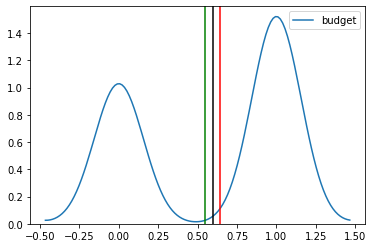

In [68]:
sns.kdeplot(voters_df['budget'])
CI = conf_int(voters_df['budget'])
plt.axvline(x=CI[0], color='green')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')

new_df = voters_df['budget'].dropna()
conf_bayes=stats.bayes_mvs(new_df, alpha=.95)[0][1] # alpha is the confidence level for this equation
print (conf_bayes[0], " :Neg Margin of Error" , conf_bayes[1], " :Pos Margin of Error" )

print(CI)
# print("Neg Margin of Error: ", CI(0), "Mean: ", CI(1), "Pos Margin of Error: ", CI(3) ) # need to work out ?

print("\nBoth the approach gave almost similar results! with 95% confidence interval on either side of this")

0.39456046308364673  :Neg Margin of Error 0.48960029341753536  :Pos Margin of Error
(0.3946967510322151, 0.44208037825059104, 0.489464005468967)

Both the approach gave similar results! with 95% confidence interval on either side of this


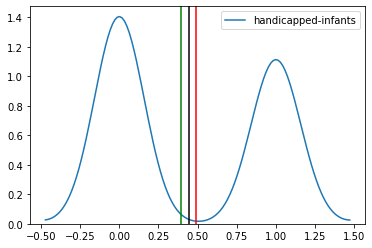

In [69]:
sns.kdeplot(voters_df['handicapped-infants'])
CI = conf_int(voters_df['handicapped-infants'])
plt.axvline(x=CI[0], color='green')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')

new_df1 = voters_df['handicapped-infants'].dropna()
conf_bayes=stats.bayes_mvs(new_df1, alpha=.95)[0][1] # alpha is the confidence level for this equation
print (conf_bayes[0], " :Neg Margin of Error" , conf_bayes[1], " :Pos Margin of Error" )

print(CI)
# print("Neg Margin of Error: ", CI(0), "Mean: ", CI(1), "Pos Margin of Error: ", CI(3) ) # need to work out ?

print("\nBoth the approach gave almost similar results! with 95% confidence interval on either side of this")

In [0]:
new_df = voters_df['budget'].dropna()
new_df
conf_bayes=stats.bayes_mvs(new_df, alpha=.95)[0][1] # alpha is the confidence level for this equation
conf_bayes

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

## Rough Work

In [5]:
# Available Facts
users = 1 # this is the true positive rate
nonusers = 0.08  # this is the false positive rate
# belived Fact
b_users =  1/1000  # prior belief
b_nonusers = 1- b_users  # complement of the prior belief
# on 1 positive test
totaluser = users * b_users
marginal = totaluser + (nonusers * b_nonusers)
posterior = totaluser / marginal
print (posterior)


0.012357884330202669


In [14]:
prob_drunk_given_positive(1/1000,1,.08)

0.012357884330202669

In [70]:
a = (prob_drunk_given_positive(1/1000,1,.08)*4)
print(a)

0.049431537320810674
